In [1]:
cd ..

/home/david/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [87]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from ipywidgets import interact, interactive, fixed, interact_manual, widgets


In [4]:
num_frames = 100

images = loadVideo("dataset/2011_09_26", num_frames)

In [5]:
print("Num images: ", len(images))
print("Image size: ", np.shape(images[0]))

Num images:  100
Image size:  (512, 1392)


In [6]:
images = cropImages(images)

In [13]:
images[0]

array([[0.328125  , 0.38671875, 0.44140625, ..., 0.28125   , 0.30859375,
        0.26171875],
       [0.27734375, 0.3125    , 0.3203125 , ..., 0.23828125, 0.21875   ,
        0.21484375],
       [0.21875   , 0.22265625, 0.22265625, ..., 0.19140625, 0.17578125,
        0.17578125],
       ...,
       [0.49609375, 0.46484375, 0.4140625 , ..., 0.32421875, 0.33203125,
        0.31640625],
       [0.5       , 0.515625  , 0.4921875 , ..., 0.3359375 , 0.34765625,
        0.34375   ],
       [0.4765625 , 0.5234375 , 0.5390625 , ..., 0.375     , 0.35546875,
        0.3125    ]], dtype=float32)

(-0.5, 199.5, 199.5, -0.5)

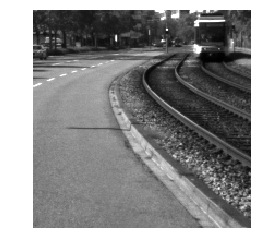

In [8]:
plt.imshow(im, cmap='gray')
plt.axis('off')

In [9]:
def f(x):
    plt.imshow(images[x], cmap="Greys_r")
    plt.axis("off")
interact(f, x=widgets.IntSlider(min=0,max=num_frames-1,step=1,value=10))

interactive(children=(IntSlider(value=10, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

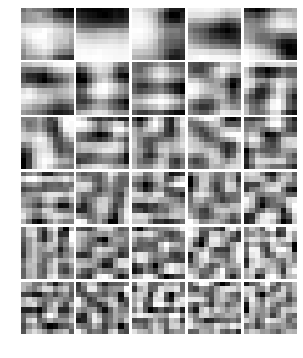

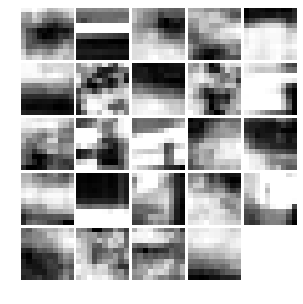

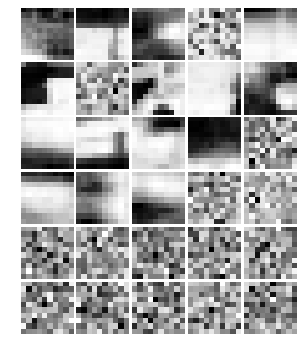

In [104]:
patch_size = 10
num_samples = 500
# num_features = 20
    
# features = generatePCADictionary(images, patch_size, num_samples, num_features)
# features = np.concatenate((features, -features))
# features = generatePSDDictionary(images, patch_size, num_samples, num_features)
# print(features.shape)
# features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)
# plotDictionary(features)
generateDictionaryPlots(images, patch_size, num_samples, [30], cols=5, s=1)

In [62]:
features[1]

array([[nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan]])

In [17]:
k = 1000
S_code = greedyMatchingPursuit(images[0], features, k)

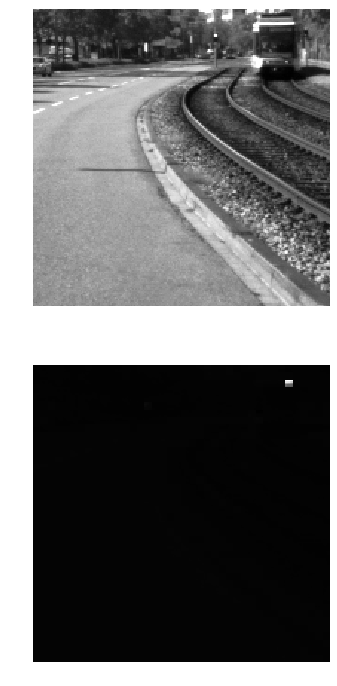

In [18]:
recon_image = generateReconImage(S_code, images[0], features)

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(18,12))
ax1.imshow(images[0], cmap="Greys_r")
ax1.axis("off")

ax2.imshow(recon_image, cmap="Greys_r")
ax2.axis("off")

plt.show()